In [1]:
import streamlit as st
import pandas as pd
from word_finder import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


############################################
#Fit the random Forest classifier for wines#
############################################

binary_features = pd.read_csv('Count_Vec.csv').iloc[:,1:]
target = pd.read_csv('target.csv').iloc[:,1:]
target["binary_country"] = target['country'].map({'US': 0, 'France': 1})
corpus = pd.read_csv('corpus.csv').iloc[:,1:]


#forest
forest=RandomForestClassifier(n_estimators=100)
forest.fit(binary_features,target['country'])

RandomForestClassifier()

In [2]:
forest_prediction('steel and mineral', forest)

'France'

In [3]:
corpus_list = list(corpus.description)
corpus_list[:2]

["First made in 2006, this succulent luscious Chardonnay is all about minerality. It's got a rich core of butterscotch and the seemingly endless layers of subtle flavors that biodynamic farming can bring. It spends 18 months on the lees prior to bottling. Drink now through 2028.",
 "The apogee of this ambitious winery's white wine efforts, this bottling of just two barrels of Clone 5 shows focused marzipan, marcona almond and white peach notes on the nose. The palate sizzles with saltiness and a lemony acidity that cuts through its brown butter richness with finesse. The finish is luxurious and long."]

In [4]:
import re
def clean_text(
    string: str, 
    punctuations=r'''!()-[]{};:'"\,<>./?@#$%^&*_~''',
    stop_words=['the', 'a', 'and', 'is', 'be', 'will']) -> str:
    """
    A method to clean text 
    """
    # Cleaning the urls
    string = re.sub(r'https?://\S+|www\.\S+', '', string)

    # Cleaning the html elements
    string = re.sub(r'<.*?>', '', string)

    # Removing the punctuations
    for x in string.lower(): 
        if x in punctuations: 
            string = string.replace(x, "") 

    # Converting the text to lower
    string = string.lower()

    # Removing stop words
    string = ' '.join([word for word in string.split() if word not in stop_words])

    # Cleaning the whitespaces
    string = re.sub(r'\s+', ' ', string).strip()
    
    #Remove numbers
    string = ''.join([i for i in string if not i.isdigit()])

    return string

#Get the text data and the target
X, Y = [clean_text(doc) for doc in corpus_list], list(target['country'])

#Vectorize the text
from sklearn.feature_extraction.text import TfidfVectorizer as tfidf
vectorizer = tfidf()
vectorized_X = vectorizer.fit_transform(corpus_list)
df_vec = pd.DataFrame(vectorized_X.toarray(), columns=vectorizer.get_feature_names())
df_vec.shape

(11019, 8037)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df_vec, Y, test_size=0.2, random_state=1)

In [10]:
#forest
tfidf_forest=RandomForestClassifier(n_estimators=200, max_depth=30)
tfidf_forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=25, n_estimators=200)

In [11]:
tfidf_forest.score(X_train,y_train), tfidf_forest.score(X_test,y_test)

(0.9787861599546228, 0.9650635208711433)

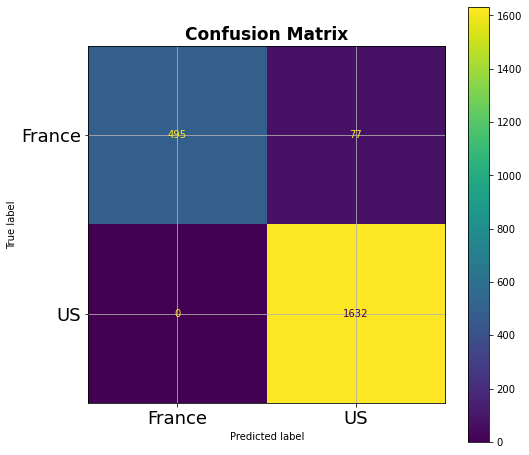

In [14]:
#Let's check the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(8,8))
plot_confusion_matrix(tfidf_forest, X_test, y_test, ax=ax)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.grid(b = None)
plt.title('Confusion Matrix', fontweight="bold", fontsize=17);
plt.savefig('RandomForestCM.jpeg');

In [15]:
495/(495+77)

0.8653846153846154